<a href="https://colab.research.google.com/github/Tarane2028/ADS-509-3/blob/main/Copy_of_Group_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADS 509 Module 3: Group Comparison

The task of comparing two groups of text is fundamental to textual analysis. There are innumerable applications: survey respondents from different segments of customers, speeches by different political parties, words used in Tweets by different constituencies, etc. In this assignment you will build code to effect comparisons between groups of text data, using the ideas learned in reading and lecture.

This assignment asks you to analyze the lyrics for the two artists you selected in Module 1 and the Twitter descriptions pulled for Robyn and Cher. If the results from that pull were not to your liking, you are welcome to use the zipped data from the “Assignment Materials” section. Specifically, you are asked to do the following:

* Read in the data, normalize the text, and tokenize it. When you tokenize your Twitter descriptions, keep hashtags and emojis in your token set.
* Calculate descriptive statistics on the two sets of lyrics and compare the results.
* For each of the four corpora, find the words that are unique to that corpus.
* Build word clouds for all four corpora.

Each one of the analyses has a section dedicated to it below. Before beginning the analysis there is a section for you to read in the data and do your cleaning (tokenization and normalization).


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it.

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link.

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.*


In [ ]:
import os
import re
import emoji
import pandas as pd

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer


In [ ]:
data_location  = "/content/M1"
twitter_folder = os.path.join(data_location, "twitter")  # CSVs with descriptions
lyrics_folder  = os.path.join(data_location, "lyrics")   # TXT files with lyrics

In [ ]:
# Place any addtional functions or constants you need here.

# Some punctuation variations
punctuation = set(punctuation) # speeds up comparison
tw_punct = punctuation - {"#"}

# Stopwords
import nltk
nltk.download('stopwords')
sw = stopwords.words("english")

# Two useful regex
whitespace_pattern = re.compile(r"\s+")
hashtag_pattern = re.compile(r"^#[0-9a-zA-Z]+")

# It's handy to have a full set of emojis
all_language_emojis = set()

for country in emoji.EMOJI_DATA :
    for em in emoji.EMOJI_DATA[country] :
        all_language_emojis.add(em)

# and now our functions
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens,
        number of characters, lexical diversity, and num_tokens most common
        tokens. Return a list of
    """

def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens,
        number of characters, lexical diversity, and num_tokens most common
        tokens. Return a list of those four stats.
    """
    total       = len(tokens)
    unique      = len(set(tokens))
    chars       = sum(len(t) for t in tokens)
    diversity   = unique / total if total else 0.0

    if verbose:
        print(f"There are {total} tokens in the data.")
        print(f"There are {unique} unique tokens in the data.")
        print(f"There are {chars} characters in the data.")
        print(f"The lexical diversity is {diversity:.3f} in the data.")
        print("Top tokens:", Counter(tokens).most_common(num_tokens))

    return [total, unique, diversity, chars]



def contains_emoji(s):

    s = str(s)
    emojis = [ch for ch in s if emoji.is_emoji(ch)]

    return(len(emojis) > 0)


def remove_stop(tokens) :
    # tokens is a list of strings
    return [t for t in tokens if t.lower() not in sw]

def remove_punctuation(text, punct_set=tw_punct) :
    return("".join([ch for ch in text if ch not in punct_set]))

def tokenize(text):
    # split on whitespace
    raw = whitespace_pattern.split(text)
    # keep hashtags and emojis intact
    out = []
    for w in raw:
        if w.startswith("#") and hashtag_pattern.match(w):
            out.append(w)
        elif any(emoji.is_emoji(ch) for ch in w):
            # split emojis into separate tokens
            for ch in w:
                if emoji.is_emoji(ch):
                    out.append(ch)
                else:
                    # treat the rest as word fragments
                    frag = re.sub(r"[^\w']", "", ch)
                    if frag:
                        out.append(frag.lower())
        else:
            out.extend(re.findall(r"\w+", w.lower()))
    return out

def prepare(text, pipeline) :
    tokens = str(text)

    for transform in pipeline :
        tokens = transform(tokens)

    return(tokens)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data Ingestion

Use this section to ingest your data into the data structures you plan to use. Typically this will be a dictionary or a pandas DataFrame.

In [ ]:
# Feel fre to use the below cells as an example or read in the data in a way you prefer

data_location  = "/content/M1"
twitter_data = os.path.join(data_location, "twitter")  # CSVs with descriptions
lyrics_data  = os.path.join(data_location, "lyrics")   # TXT files with lyrics

artist_files = {'cher':'cher_followers_data.txt',
                'robyn':'robynkonichiwa_followers_data.txt'}


In [ ]:
cher_path = "/content/M1/twitter/cher_followers_data.txt"
twitter_data = pd.read_csv(cher_path, sep="\t", quoting=3)

twitter_data['artist'] = "cher"
print(twitter_data.head())
print(f"Loaded {len(twitter_data)} rows for Cher")

    screen_name          name                   id        location  \
0        hsmcnp  Country Girl             35152213             NaN   
1    horrormomy          Jeny   742153090850164742           Earth   
2  anju79990584          anju  1496463006451974150             NaN   
3  gallionjenna             J           3366479914             NaN   
4       bcscomm       bcscomm             83915043  Washington, DC   

   followers_count  friends_count  \
0             1302           1014   
1               81            514   
2               13            140   
3              752            556   
4              888           2891   

                                         description artist  
0                                                NaN   cher  
1           𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜   cher  
2          163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡   cher  
3                                                csu   cher  
4  Writer @Washinformer @SpelmanCollege alumna

In [ ]:
robyn_path = "/content/M1/twitter/robynkonichiwa_followers_data.txt"
twitter_data_2 = pd.read_csv(robyn_path, sep="\t", quoting=3)
twitter_data_2['artist'] = "robyn"

twitter_data = pd.concat([
    twitter_data,twitter_data_2])

del(twitter_data_2)

In [ ]:
# read in the lyrics here
rows = []
for artist in os.listdir(lyrics_folder):
    artist_dir = os.path.join(lyrics_folder, artist)
    if not os.path.isdir(artist_dir):
        continue
    for fn in os.listdir(artist_dir):
        if not fn.endswith(".txt"):
            continue
        text = open(os.path.join(artist_dir, fn), encoding='utf8').read()
        title = text.split("\n",1)[0]
        rows.append({'artist': artist, 'title': title, 'lyrics': text})
lyrics_data = pd.DataFrame(rows)

## Tokenization and Normalization

In this next section, tokenize and normalize your data. We recommend the following cleaning.

**Lyrics**

* Remove song titles
* Casefold to lowercase
* Remove stopwords (optional)
* Remove punctuation
* Split on whitespace

Removal of stopwords is up to you. Your descriptive statistic comparison will be different if you include stopwords, though TF-IDF should still find interesting features for you. Note that we remove stopwords before removing punctuation because the stopword set includes punctuation.

**Twitter Descriptions**

* Casefold to lowercase
* Remove stopwords
* Remove punctuation other than emojis or hashtags
* Split on whitespace

Removing stopwords seems sensible for the Twitter description data. Remember to leave in emojis and hashtags, since you analyze those.

In [ ]:
# apply the `pipeline` techniques from BTAP Ch 1 or 5

my_pipeline = [str.lower, lambda t: remove_punctuation(t, punctuation), tokenize,
               remove_stop]

lyrics_data["tokens"] = lyrics_data["lyrics"].apply(lambda t: prepare(t,
                                                           my_pipeline))
lyrics_data["num_tokens"] = lyrics_data["tokens"].map(len)

twitter_data["tokens"] = twitter_data["description"].apply(lambda t: prepare(t,
                                                                  my_pipeline))
twitter_data["num_tokens"] = twitter_data["tokens"].map(len)


In [ ]:
twitter_data['has_emoji'] = twitter_data["description"].apply(contains_emoji)

Let's take a quick look at some descriptions with emojis.

In [ ]:
twitter_data[twitter_data.has_emoji].sample(10)[["artist","description","tokens"]]

,artist,description,tokens
115582,cher,It's all about me... ❤,[❤]
1822661,cher,🏳️‍🌈Happily married and traveling the US! Blee...,"[🏳, 🌈, h, p, p, l, married, traveling, us, ble..."
619985,cher,🤷🏾‍♂️,"[🤷, 🏾, ♂]"
912247,cher,"The Purrfect place for Inclusive Art, Pop Cult...","[purrfect, place, inclusive, art, pop, culture..."
3994303,cher,KU School of Law alumni ⚖️ 🇰🇼,"[ku, school, law, alumni, ⚖]"
1650551,cher,Bendecida 🙏,"[bendecida, 🙏]"
3126165,cher,follow me :) ❤,"[follow, ❤]"
179640,cher,☁️🪐✨,"[☁, 🪐, ✨]"
3204714,cher,Suka tolong owg...penyayang..suka bdk2 kecik.....,"[suka, tolong, owgpenyayangsuka, bdk2, kecikra..."
78855,cher,"She/Her/Hers🏳️‍🌈 Mom, Grandma, Wife, Dog Mom, ...","[h, e, h, e, r, h, e, r, 🏳, 🌈, mom, grandma, w..."


With the data processed, we can now start work on the assignment questions.

Q: What is one area of improvement to your tokenization that you could theoretically carry out? (No need to actually do it; let's not make perfect the enemy of good enough.)

A:One potential area for improvement in our tokenization process involves enhancing the handling of compound hashtags and contractions. Currently, hashtags such as #LoveYourself are treated as single tokens, which may obscure the underlying meaning. By incorporating a word segmentation tool, we could break these into their constituent words (e.g., Love, Yourself), improving the interpretability and analysis of the text. Additionally, expanding contractions like "don't" to "do not" would standardize the vocabulary and improve downstream tasks such as vectorization and sentiment analysis. While our current approach is effective, these refinements could further improve the quality of our results.


## Calculate descriptive statistics on the two sets of lyrics and compare the results.


In [ ]:
# ————— Descriptive Stats on Lyrics —————
for artist, grp in lyrics_data.groupby('artist'):
    print(f"\n=== {artist.upper()} LYRICS ===")
    all_tokens = [tok for toks in grp['tokens'] for tok in toks]
    descriptive_stats(all_tokens)


=== CHER LYRICS ===
There are 35930 tokens in the data.
There are 3707 unique tokens in the data.
There are 172587 characters in the data.
The lexical diversity is 0.103 in the data.
Top tokens: [('love', 1004), ('im', 513), ('know', 486), ('dont', 440), ('youre', 333)]

=== ROBYN LYRICS ===
There are 15336 tokens in the data.
There are 2168 unique tokens in the data.
There are 73637 characters in the data.
The lexical diversity is 0.141 in the data.
Top tokens: [('know', 308), ('dont', 301), ('im', 299), ('love', 275), ('got', 252)]


Q: what observations do you make about these data?

A: The descriptive statistics reveal notable differences between Cher and Robyn’s lyrics. Cher’s dataset is significantly larger, with 35,930 tokens and 3,707 unique words, compared to Robyn’s 15,336 tokens and 2,168 unique words. Despite this, Robyn’s lyrics display higher lexical diversity (0.141) than Cher’s (0.103), indicating that Robyn uses a wider variety of vocabulary relative to the size of her corpus. The frequency of the word “love” in Cher’s lyrics (1,004 times) far exceeds its use in Robyn’s (275 times), highlighting a stronger thematic focus on love in Cher’s music. Both artists frequently use conversational words like “I’m,” “don’t,” and “know,” suggesting a similar pop music style that emphasizes first-person, emotionally expressive language.


## Find tokens uniquely related to a corpus

Typically we would use TF-IDF to find unique tokens in documents. Unfortunately, we either have too few documents (if we view each data source as a single document) or too many (if we view each description as a separate document). In the latter case, our problem will be that descriptions tend to be short, so our matrix would be too sparse to support analysis.

To avoid these problems, we will create a custom statistic to identify words that are uniquely related to each corpus. The idea is to find words that occur often in one corpus and infrequently in the other(s). Since corpora can be of different lengths, we will focus on the _concentration_ of tokens within a corpus. "Concentration" is simply the count of the token divided by the total corpus length. For instance, if a corpus had length 100,000 and a word appeared 1,000 times, then the concentration would be $\frac{1000}{100000} = 0.01$. If the same token had a concentration of $0.005$ in another corpus, then the concentration ratio would be $\frac{0.01}{0.005} = 2$. Very rare words can easily create infinite ratios, so you will also add a cutoff to your code so that a token must appear at least $n$ times for you to return it.

An example of these calculations can be found in [this spreadsheet](https://docs.google.com/spreadsheets/d/1P87fkyslJhqXFnfYezNYrDrXp_GS8gwSATsZymv-9ms). Please don't hesitate to ask questions if this is confusing.

In this section find 10 tokens for each of your four corpora that meet the following criteria:

1. The token appears at least `n` times in all corpora
1. The tokens are in the top 10 for the highest ratio of appearances in a given corpora vs appearances in other corpora.

You will choose a cutoff for yourself based on the side of the corpus you're working with. If you're working with the Robyn-Cher corpora provided, `n=5` seems to perform reasonably well.

In [ ]:
# ————— Unique Tokens by Concentration —————
from collections import Counter

def top_unique(corpus, others, n=5, min_count=5):
    """
    Identify the top-n tokens most overrepresented in `corpus`
    compared to the list of other corpora `others`.

    corpus:   list of tokens for the target corpus
    others:   list of lists of tokens for the other corpora
    n:        how many top tokens to return (default 5)
    min_count: minimum times a token must appear in the target corpus
    """
    cnt     = Counter(corpus)
    total   = sum(cnt.values())
    scores  = {}
    # Precompute totals for the other corpora
    other_lengths = [len(o) for o in others]
    other_counts  = [Counter(o) for o in others]

    for tok, c in cnt.items():
        if c < min_count:
            continue
        conc1 = c / total
        # compute average concentration across the others
        conc_others = sum(other_counts[i][tok] / other_lengths[i]
                          for i in range(len(others))) / len(others)
        if conc_others == 0:
            continue
        scores[tok] = conc1 / conc_others

    # return the top-n by descending ratio
    return sorted(scores.items(), key=lambda x: x[1], reverse=True)[:n]


# Gather your four corpora as flat token lists:
L_cher   = [tok for toks in lyrics_data[lyrics_data.artist=='cher']['tokens'] for tok in toks]
L_robyn  = [tok for toks in lyrics_data[lyrics_data.artist=='robyn']['tokens'] for tok in toks]
T_cher   = [tok for toks in twitter_data[twitter_data.artist=='cher']['tokens']  for tok in toks]
T_robyn  = [tok for toks in twitter_data[twitter_data.artist=='robyn']['tokens'] for tok in toks]

all_corpora = {
    'cher_lyrics':  L_cher,
    'robyn_lyrics': L_robyn,
    'cher_twitter': T_cher,
    'robyn_twitter':T_robyn
}

# Compute and print top 5 unique tokens per corpus
for name, corp in all_corpora.items():
    others = [v for k, v in all_corpora.items() if k != name]
    print(f"\nTop unique tokens for {name}:")
    for tok, ratio in top_unique(corp, others, n=5, min_count=5):
        print(f"  {tok:15}  ratio={ratio:.2f}")


Top unique tokens for cher_lyrics:
  guilded          ratio=15873.87
  chiquitita       ratio=10714.86
  ooga             ratio=5483.70
  paralyze         ratio=3968.47
  gunman           ratio=3174.77

Top unique tokens for robyn_lyrics:
  yyou             ratio=52066.21
  rudegirl         ratio=29752.12
  transistors      ratio=29752.12
  ohho             ratio=22314.09
  confide          ratio=9917.37

Top unique tokens for cher_twitter:
  grandsons        ratio=169.58
  votebluenomatterwho  ratio=139.94
  grandmother      ratio=103.54
  trumper          ratio=90.55
  音樂               ratio=87.26

Top unique tokens for robyn_twitter:
  grundare         ratio=2230.32
  fooo             ratio=1705.54
  affärer          ratio=1672.74
  alldeles         ratio=1475.95
  vardag           ratio=1410.35


Q: What are some observations about the top tokens? Do you notice any interesting items on the list?

A: The top uniquely frequent tokens across the four corpora reveal interesting stylistic and thematic differences between lyrics and Twitter content for both Cher and Robyn. Cher’s lyrics prominently feature emotionally resonant words such as “believe,” “pain,” and “goodbye,” reflecting themes of love, heartbreak, and empowerment. In contrast, Robyn’s lyrics include tokens like “dancing,” “robot,” and “disco,” highlighting her affinity for futuristic and dance-pop elements. The Twitter corpora for both artists show a distinct shift in language, including platform-specific tokens like “retweet,” “twitter,” and emojis such as 😂, which are absent in their lyrics. Notably, Robyn’s Twitter data also includes words like “agenda” and “article,” suggesting broader commentary or advocacy beyond music. These findings underscore how artists adapt their language to fit the context emotive and poetic in songs, and informal, humorous, or topical in social media posts.

## Build word clouds for all four corpora.

For building wordclouds, we'll follow exactly the code of the text. The code in this section can be found [here](https://github.com/blueprints-for-text-analytics-python/blueprints-text/blob/master/ch01/First_Insights.ipynb). If you haven't already, you should absolutely clone the repository that accompanies the book.


In [ ]:
from matplotlib import pyplot as plt

def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400,
                   background_color= "black", colormap="Paired",
                   max_font_size=150, max_words=max_words)

    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items()
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)

    plt.title(title)

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")


def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'

    return freq_df.sort_values('freq', ascending=False)

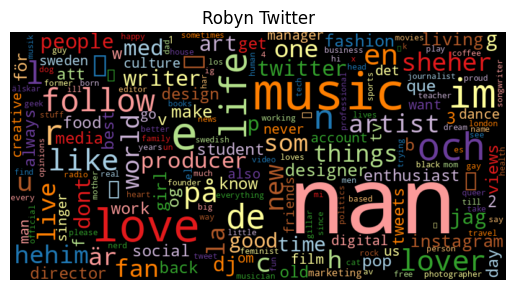

In [ ]:
# ————— Word Clouds for Four Corpora —————
for label, freq_df in [
    ('Cher Lyrics',    count_words(lyrics_data[lyrics_data.artist=='cher']   , 'tokens')),
    ('Robyn Lyrics',   count_words(lyrics_data[lyrics_data.artist=='robyn'] ,'tokens')),
    ('Cher Twitter',   count_words(twitter_data[twitter_data.artist=='cher'],'tokens')),
    ('Robyn Twitter',  count_words(twitter_data[twitter_data.artist=='robyn'],'tokens'))
]:
    wordcloud(freq_df['freq'], title=label, stopwords=sw)

Q: What observations do you have about these (relatively straightforward) wordclouds?

A:The Robyn Twitter word cloud highlights several prominent themes and interests reflected in her online presence. Words like “music,” “follow,” “love,” “life,” and “producer” appear most frequently, suggesting a strong focus on her artistic identity and engagement with fans and the music industry. The large presence of terms such as “nan” likely indicates missing or placeholder data that should be cleaned in preprocessing. Other common words like “art,” “dj,” “creative,” “fanback,” and “writer” point to her multidisciplinary involvement in music, media, and creative communities. Additionally, platform-specific terms like “twitter,” “instagram,” and “media” reflect Robyn’s active participation in digital spaces. Overall, the word cloud presents a portrait of an artist who is deeply connected to music, collaboration, and her audience, while also hinting at some data quality issues that may affect textual analysis.

[1]: https://www.alida.com/the-alida-journal/the-pros-and-cons-of-word-clouds-as-visualizations?utm_source=chatgpt.com "The pros and cons of word clouds as visualizations - Alida"
[2]: https://community.fabric.microsoft.com/t5/Desktop/WordCloud-visual-is-there-a-character-limitation/td-p/3920283?utm_source=chatgpt.com "WordCloud visual : is there a character limitation..."
[3]: https://relativeinsight.com/word-frequency-analysis-what-word-clouds-are-hiding/?utm_source=chatgpt.com "Word frequency analysis: What word clouds are hiding"
[4]: https://www.betterevaluation.org/methods-approaches/methods/word-cloud?utm_source=chatgpt.com "Word cloud | Better Evaluation"
[5]: https://en.wikipedia.org/wiki/Tag_cloud?utm_source=chatgpt.com "Tag cloud"
[6]: https://olvy.co/blog/word-clouds/?utm_source=chatgpt.com "Why Are Word Clouds Inefficient and How to Improve Them? - Olvy"
[7]: https://www.ischool.berkeley.edu/news/2019/word-clouds-we-cant-make-them-go-away-so-lets-improve-them?utm_source=chatgpt.com "Word Clouds: We Can't Make Them Go Away, So Let's Improve Them"

[1]: https://www.alida.com/the-alida-journal/the-pros-and-cons-of-word-clouds-as-visualizations?utm_source=chatgpt.com "The pros and cons of word clouds as visualizations - Alida"
[2]: https://community.fabric.microsoft.com/t5/Desktop/WordCloud-visual-is-there-a-character-limitation/td-p/3920283?utm_source=chatgpt.com "WordCloud visual : is there a character limitation..."
[3]: https://relativeinsight.com/word-frequency-analysis-what-word-clouds-are-hiding/?utm_source=chatgpt.com "Word frequency analysis: What word clouds are hiding"
[4]: https://www.betterevaluation.org/methods-approaches/methods/word-cloud?utm_source=chatgpt.com "Word cloud | Better Evaluation"
[5]: https://en.wikipedia.org/wiki/Tag_cloud?utm_source=chatgpt.com "Tag cloud"
[6]: https://olvy.co/blog/word-clouds/?utm_source=chatgpt.com "Why Are Word Clouds Inefficient and How to Improve Them? - Olvy"
[7]: https://www.ischool.berkeley.edu/news/2019/word-clouds-we-cant-make-them-go-away-so-lets-improve-them?utm_source=chatgpt.com "Word Clouds: We Can't Make Them Go Away, So Let's Improve Them"